# Softmax Regression

To define outputs that carry out solutions to represent more than binary results (aka *Multiclass Classification*), use the softmax algorithm. 

Up to now, logistic regression has computed two numbers, seen as the probability of been one result vs the other. Extrapolating these to variables, called a1 & a2, where a1 + a2 = 1 (probability), mutliple more variables can be represented in the output definition as long as the probability constraint is maintained (sum = 1).

## Example - Output y = [1, 2, 3, 4]

Defining the z-vectors:

$z_1 = \vec{w}_1 \cdot \vec{x} + b_1$

$z_2 = \vec{w}_2 \cdot \vec{x} + b_2$

$z_3 = \vec{w}_3 \cdot \vec{x} + b_3$

$z_4 = \vec{w}_4 \cdot \vec{x} + b_4$

Plug into the activation equations with $e$:

$a_1 = \frac{e^{z_1}}{e^{z_1} + e^{z_2} + e^{z_3} + e^{z_4}} = P(y = 1 | \vec{x})$

$a_2 = \frac{e^{z_2}}{e^{z_1} + e^{z_2} + e^{z_3} + e^{z_4}} = P(y = 2 | \vec{x})$

$a_3 = \frac{e^{z_3}}{e^{z_1} + e^{z_2} + e^{z_3} + e^{z_4}} = P(y = 3 | \vec{x})$

$a_4 = \frac{e^{z_4}}{e^{z_1} + e^{z_2} + e^{z_3} + e^{z_4}} = P(y = 4 | \vec{x})$

## General Case - Output y = [1, ..., N]

$z_j = \vec{w}_j \cdot \vec{x} + b_j$

where

$j = 1, ..., N$

Making the activation function (with parameters $w_1, ..., w_N$ & $b_1, ..., b_N$):

$a_j = \frac{e^{z_j}}{\sum_{k=1}^N{e^{z_k}}} = P(y = j | \vec{x})$

## Cost Function

Following the general case, the *crossentropy* loss function is defined as:

$loss(a_1, ..., a_N, y) = \begin{cases}
 -\text{log} a_1 &\text{if } y = 1\\
 ...\\
 -\text{log} a_N &\text{if } y = N
\end{cases}
$

## Neural Netowrk with Softmax Output

Just adds an additional step in the output layer where you compute the $z$-vectors first before the activation and use the softmax regression model. This was essentially being done before, but following a binary output. In `tensorflow` Dense layers, define the activation as "softmax" and the "SparseCategoricalCrossentropy" for the loss function.

- $z$ is also called the "logits" value

### Numerical Roundoff Errors

Due to floating point values rounding off intermediate variables (since they're stored in memory and require a finite resolution), it can cause accuracy problems- especially for the softmax regression model. To avoid numerical rounding errors, define the loss function all inline with *no* intermediate variables with common code:

$loss = -y\text{log}(\frac{1}{1 + e^{-z}}) - (1 - y)\text{log}(1 - \frac{1}{1 + e^{-z}})$

Not:

$a = \frac{1}{1 + e^{-z}}$

$loss = -y\text{log}a - (1 - y)\text{log}(1 - a)$

In tensorflow:

In [17]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=25, activation='relu'),
    tf.keras.layers.Dense(units=25, activation='relu'),
    tf.keras.layers.Dense(units=25, activation='linear'), # not 'sigmoid'!
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)) # ensure you tell tensorflow to prioritize logits (aka z term) since it can be extremely small or large

# model.fit(X,Y,epochs=100)

# logit = model(X) !!! Returns the logit value now! Must do an extra step to get the prediction,
# f_x = tf.nn.sigmoid(logit)

Numerical rounding errors are still not that bad for Softmax, however it's still recommended

# Multilabel Classification

In cases where you want to classify multiple labels for the corresponding outputs, ex:

![ ](multilabel.png)

You can:

- use multiple NN as the same time (actually not that bad)
- train a single NN to simultaeneously define individual sigmoid activations in the output layer

# Lab - Softmax

In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from lab_utils_softmax import plt_softmax
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [19]:
def my_softmax(z):
    ez = np.exp(z)              #element-wise exponenial
    sm = ez/np.sum(ez)
    return(sm)

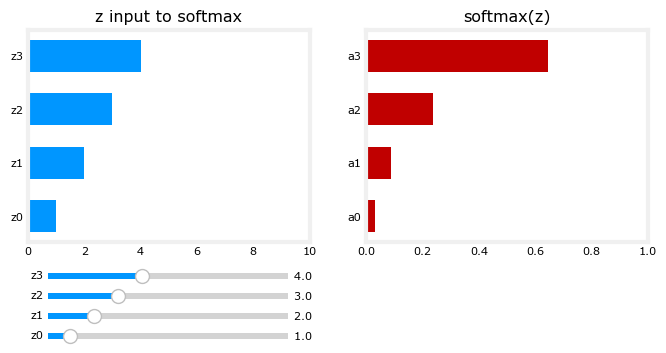

In [20]:
plt.close("all")
plt_softmax(my_softmax)

In [21]:
# make  dataset for example
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

### Using the Lossy Loss Function

In [22]:
model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax')    # < softmax activation here
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train,y_train,
    epochs=10
)
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred [:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

Epoch 1/10


63/63 [==============================] - 1s 1ms/step - loss: 0.9067
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.4558
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.2003
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1047
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0728
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0582
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0494
Epoch 8/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0437
Epoch 9/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0398
Epoch 10/10
63/63 [==============================] - 0s 1ms/step
[[1.94e-03 4.99e-03 9.88e-01 4.98e-03]
 [9.91e-01 6.93e-03 8.14e-04 8.63e-04]]
largest value 0.9999993 smallest value 9.895142e-09


### Preferring the Numerically Corrected Loss Function

In [23]:
preferred_model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')   #<-- Note
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),
)

preferred_model.fit(
    X_train,y_train,
    epochs=10
)
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

Epoch 1/10
63/63 [==============================] - 1s 1ms/step - loss: 0.6233
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.2525
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1287
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0840
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0647
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0549
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0484
Epoch 8/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0441
Epoch 9/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0404
Epoch 10/10
63/63 [==============================] - 0s 926us/step
two example output vectors:
 [[-1.33 -1.19  5.41  1.23]
 [ 9.63  5.01 -0.45 -4.34]]
largest value 19.26674 smallest value -6.7465386


In [24]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[1.15e-03 1.33e-03 9.83e-01 1.50e-02]
 [9.90e-01 9.78e-03 4.15e-05 8.50e-07]]
largest value 0.9999994 smallest value 5.041679e-12


In [25]:
for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-1.33 -1.19  5.41  1.23], category: 2
[ 9.63  5.01 -0.45 -4.34], category: 0
[ 7.16  4.17 -0.36 -3.55], category: 0
[-0.38  4.58 -1.26 -2.43], category: 1
[ 3.67 -0.88  9.44 -1.39], category: 2


# Lab - Multi-class Classification

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [27]:
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

b:\COURSERA\machine-learning\2-advanced-learning-algorithms\lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


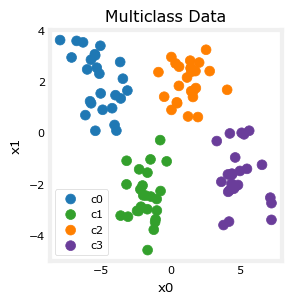

In [28]:
plt_mc(X_train,y_train,classes, centers, std=std)

In [29]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


In [30]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        Dense(2, activation = 'relu',   name = "L1"),
        Dense(4, activation = 'linear', name = "L2")
    ]
)

In [31]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X_train,y_train,
    epochs=200
)

Epoch 1/200
4/4 [==============================] - 0s 3ms/step - loss: 3.8680
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 3.4823
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 3.1665
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 2.8579
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 2.6130
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 2.3931
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 2.2135
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 2.0575
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 1.9328
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 1.8302
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 1.7444
Epoch 12/200
4/4 [==============================] - 0s 2ms/step - loss: 1.6730
Epoch 13/200
4/4 [==============================] - 0s 2ms/st

184/184 [==============================] - 0s 1ms/step


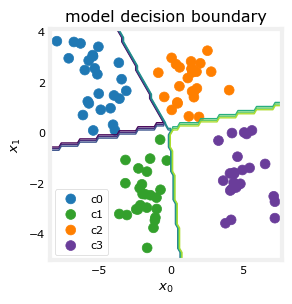

In [32]:
plt_cat_mc(X_train, y_train, model, classes)

In [33]:
# gather the trained parameters from the first layer
l1 = model.get_layer("L1")
W1,b1 = l1.get_weights()

b:\COURSERA\machine-learning\2-advanced-learning-algorithms\lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
b:\COURSERA\machine-learning\2-advanced-learning-algorithms\lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


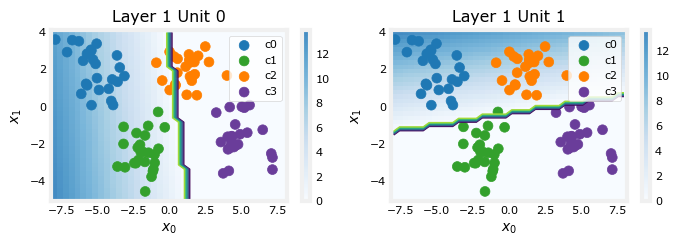

In [34]:
# plot the function of the first layer
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, classes)

b:\COURSERA\machine-learning\2-advanced-learning-algorithms\lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
b:\COURSERA\machine-learning\2-advanced-learning-algorithms\lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
b:\COURSERA\machine-learning\2-advanced-learning-algorithms\lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
b:\COURSERA\machine-learning\2-advanced-learning-algorithms\lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


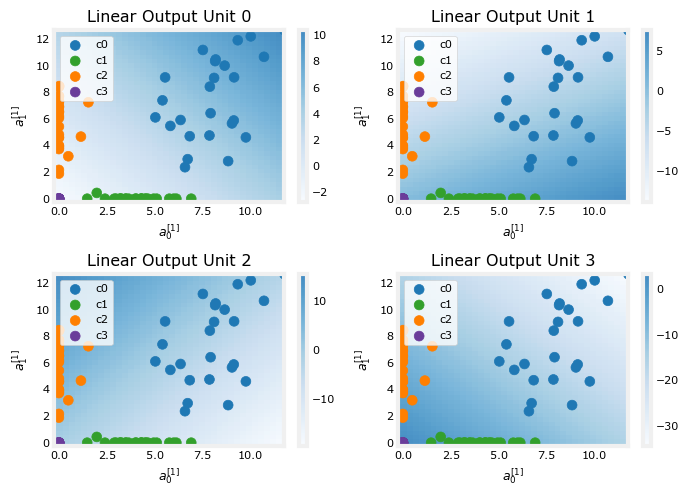

In [35]:
# gather the trained parameters from the output layer
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()
# create the 'new features', the training examples after L1 transformation
Xl2 = np.maximum(0, np.dot(X_train,W1) + b1)

plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2, b2, classes,
                        x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))